# Anomaly Detection - Statistical Methods

## Contents:

   **1) Gaussian Distribution**
   
   **2) Box-plot**


## 2.1 Abastract

Statistical methods rely on the preassumptions on the data validation, which is to assume that the data is generated by a statistical distribution/model in general way. In another word, the data that does not follow the assumption/model is the outlier.

**The regular strategy is:** study a fitted model based on data-generated model, then detect those objects in the low-probability area and regard them as outliers

**Which can be reworded as follows:** build a model using statistical methods, and consider the possibility that the data/object can meet this model.

Two methods: **parametric method** & **non-parametric method**

**parametric method:** assume that data follows a dist($\theta$), the distribution tells the probability of a data point $x$ generated by this model. If the probability is lower, then the possibility that the data point $x$ is more likely to be an outlier.

**non-parametric method:** try to determine the model from the dataset itself, rather than a pre-assumption of prior statistical model. The non-parametric method still relies on the parameters of model, since no model could be determined without parameters. However,the total number and properties of parameters are less constrained with non-parametric method.

## 2.2 Parametric Method

### 2.2.1 One-dimensional outlier detection accoding to normal distribution

**One dimentional data** is a data with only one value or property.

We assume that the data follows Normal($\mu$,$\sigma^2$), then the model will study input data with parameters determined. Finally, those data with low probability will be flagged as outliers.

For example,

$\mu = \frac 1m\sum_{i=1}^m x^{(i)}$

$\sigma^2 = \frac 1m\sum_{i=1}^m (x^{(i)}-\mu)^2$

$f(x)=\frac 1{\sqrt{2\pi}\sigma}exp(-\frac{(x-\mu)^2}{2\sigma^2})$

我们可以用3$\sigma$的方法来找寻一维数据的离异点，也就是所谓的99.73%的置信区间。在这个区间之外的数据点视作为离群点。

我们也可以用box-plot来可视化这个过程：

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

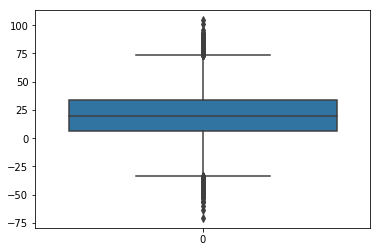

In [4]:
data = np.random.randn(50000)*20+20
sns.boxplot(data=data)

### 2.2.2 Multiple-dimensional outlier detection

**1) Multiple independent dimentional data** is a data with multiple independent values or properties.

The easiest way is to assume that each dimension of data is independent so that we can simply apply one-dimensional model to multi-dimensional model. For example,


$\mu_j=\frac 1m\sum_{i=1}^m x_j^{(i)}$

$\sigma_j^2=\frac 1m\sum_{i=1}^m (x_j^{(i)}-\mu_j)^2$



$f(x)=\prod_{j=1}^n f(x_j;\mu_j,\sigma_j^2)=\prod_{j=1}^n\frac 1{\sqrt{2\pi}\sigma_j}exp(-\frac{(x_j-\mu_j)^2}{2\sigma_j^2})$

**2) Multiple dependent dimensional data**: assume it follows multivariate gaussian distribution

Easiest way is to utilize multivariate gaussian distribution model

$\mu=\frac{1}{m}\sum^m_{i=1}x^{(i)}$

$\sum=\frac{1}{m}\sum^m_{i=1}(x^{(i)}-\mu)(x^{(i)}-\mu)^T$

$p(x)=\frac{1}{(2 \pi)^{\frac{n}{2}}|\Sigma|^{\frac{1}{2}}} \exp \left(-\frac{1}{2}(x-\mu)^{T} \Sigma^{-1}(x-\mu)\right)$

**3) Complicated data distribution**: cannot apply multivariate gaussian/one-dimensional gaussian models to the dataset

We could apply the Gaussian Mixture Model (GMM) to the distribution

GMM is compromised of multiple gaussian models with different parameters and weights.

EM method is applied to achieve the best sets of each gaussian model's parameters and weights with maximizing likelihood.

GMM could be used to simulate any distribution when dataset is large enough.

## 2.3 Non-parametric Methods

The model will be studied from input data instead of assumption of prior distribution. In general, non-parametric method will requires less assumptions on the data distribution, and therefore can be easily applied in more cases.

**Anomaly detection by utilizing histogram plot：** histogram plot is a frequently used non-parametric statistical model, which can be used to detect the outlier data. The process is shown as below:

1. 建构一个直方图，这种直方图的数据来源可以实一维的也可以是多维的。

    尽管非参数方法并不需要假定任何先验的统计模型，但是通常来说要求用户提供参数。例如，用户必须指定直方图的类型：等宽的或是等深的；和其他的参数：直方图的箱数或是每个箱的大小。

2. 检测异常点。为了确定一个对象是否是异常点，可以对照直方图来检查他。最简单的办法是：例如该点是否落入直方图的一个箱体中，如果是则是正常点，如果不是则是异常点。
    更复杂的办法：**用直方图赋予每个对象一个异常点得分，像是对象的异常点得分为该对象落入的箱体的容积的倒数**。

## 2.4 HBOS

Full name of HBOS is: Histogram-based Outlier Score. This is a combination of univariate methods, and it will not be able to model the correlation between feature variables.

The computation speed of this method is very fast, and so the method can be applied to big dataset.

The assumption of this method: each dimension is independent.

Score: segregate feature variable into bins in each dimension, and then score the data point by the density of the corresponding bins.
The higher density is, the lower outlier score is.

HBOS Algorithm:

1.为每个数据维度做出数据直方图。对分类数据统计每个值的频数并计算相对频率。对数值数据根据分布的不同采用以下两种方法：

静态宽度直方图：标准的直方图构建方法，在值范围内使用k个等宽箱。样本落入每个桶的频率（相对数量）作为密度（箱子高度）的估计。时间复杂度：$O(n)$

动态宽度直方图：首先对所有值进行排序，然后固定数量的$\frac{N}{k}$个连续值装进一个箱里，其 中N是总实例数，k是箱个数；直方图中的箱面积表示实例数。因为箱的宽度是由箱中第一个值和最后一个值决定的，所有箱的面积都一样，因此每一个箱的高度都是可计算的。这意味着跨度大的箱的高度低，即密度小，只有一种情况例外，超过k个数相等，此时允许在同一个箱里超过$\frac{N}{k}$值。

时间复杂度：$O(n\times log(n))$

2.对每个维度都计算了一个独立的直方图，其中每个箱子的高度表示密度的估计。然后为了使得最大高度为1（确保了每个特征与异常值得分的权重相等），对直方图进行归一化处理。最后，每一个实例的HBOS值由以下公式计算：

$$ H B O S(p)=\sum_{i=0}^{d} \log \left(\frac{1}{\text {hist}_{i}(p)}\right) $$

**推导过程：**

假设样本p第 i 个特征的概率密度为$p_i(p)$ ，则p的概率密度可以计算为： $$ P(p)=P_{1}(p) P_{2}(p) \cdots P_{d}(p) $$ 两边取对数： $$ \begin{aligned} \log (P(p)) &=\log \left(P_{1}(p) P_{2}(p) \cdots P_{d}(p)\right) =\sum_{i=1}^{d} \log \left(P_{i}(p)\right) \end{aligned} $$ 概率密度越大，异常评分越小，为了方便评分，两边乘以“-1”： $$ -\log (P(p))=-1 \sum_{i=1}^{d} \log \left(P_{t}(p)\right)=\sum_{i=1}^{d} \frac{1}{\log \left(P_{i}(p)\right)} $$ 最后可得： $$ H B O S(p)=-\log (P(p))=\sum_{i=1}^{d} \frac{1}{\log \left(P_{i}(p)\right)} $$

## 2.5 Conclusion

1. Statistical way of anomaly detection is to study the model from the data, and then to discriminate the normal & outlier data points. 
    
    The pros of statistical method is that the anomaly detection in statistics can be easily justified with the proved preassumptions.

2. HBOS is adept at detecting the global outliers rather than local outliers, but this algorithm is much faster than most other standard algorithms, especially on big dataset.

## 2.6 Exercise

In [29]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import stats
from pyod.models.hbos import HBOS

In [24]:
path = os.path.abspath(r"C:\\Users\\zhan1\\OneDrive\\Toy.csv")
df_rawData = pd.read_csv(path,encoding=u"gbk")
df_rawData

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016/11/8,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016/11/8,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016/6/12,2016/6/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014/6/9,2014/6/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014/6/9,2014/6/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014/6/9,2014/6/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014/6/9,2014/6/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014/6/9,2014/6/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [31]:
cols = ['Sales','Profit']
X = df_rawData[cols].values

In [32]:
clf = HBOS(contamination=0.01)
clf.fit(X)
scores = clf.decision_function(X)

In [34]:
y_pred = clf.predict(X)

In [35]:
n_inliers = len(y_pred)-np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred==1)

In [37]:
clf.decision_scores_

array([6.62806936, 6.62806936, 6.62806936, ..., 6.62806936, 6.62806936,
       6.62806936])

In [38]:
n_outliers

90

In [44]:
##inliers
X[y_pred==0]

array([[261.96  ,  41.9136],
       [731.94  , 219.582 ],
       [ 14.62  ,   6.8714],
       ...,
       [258.576 ,  19.3932],
       [ 29.6   ,  13.32  ],
       [243.16  ,  72.948 ]])

In [46]:
##outlies
X[y_pred==1]

array([[ 3083.43  , -1665.0522],
       [ 8159.952 , -1359.992 ],
       [ 1188.    ,  -950.4   ],
       [ 3991.98  ,  1995.99  ],
       [ 4355.168 ,  1415.4296],
       [ 1272.63  ,  -814.4832],
       [ 6354.95  ,  3177.475 ],
       [ 2999.95  ,  1379.977 ],
       [ 7999.98  , -3839.9904],
       [ 1141.47  ,  -760.98  ],
       [ 2065.32  ,  -619.596 ],
       [ 2715.93  ,  1276.4871],
       [ 4899.93  ,  2400.9657],
       [ 1088.792 , -1850.9464],
       [  590.058 ,  -786.744 ],
       [ 3040.    ,  1459.2   ],
       [ 3149.93  ,  1480.4671],
       [ 4663.736 , -1049.3406],
       [  294.62  ,  -766.012 ],
       [ 3999.95  ,  1159.9855],
       [ 4548.81  ,  1228.1787],
       [ 8187.65  ,   327.506 ],
       [11199.968 ,  3919.9888],
       [  652.995 ,  -935.9595],
       [22638.48  , -1811.0784],
       [  762.594 , -1143.891 ],
       [ 2690.97  ,  1264.7559],
       [ 1633.188 , -1306.5504],
       [ 2549.985 , -3399.98  ],
       [ 1799.994 , -2639.9912],
       [ 3